In [1]:
from utils import *

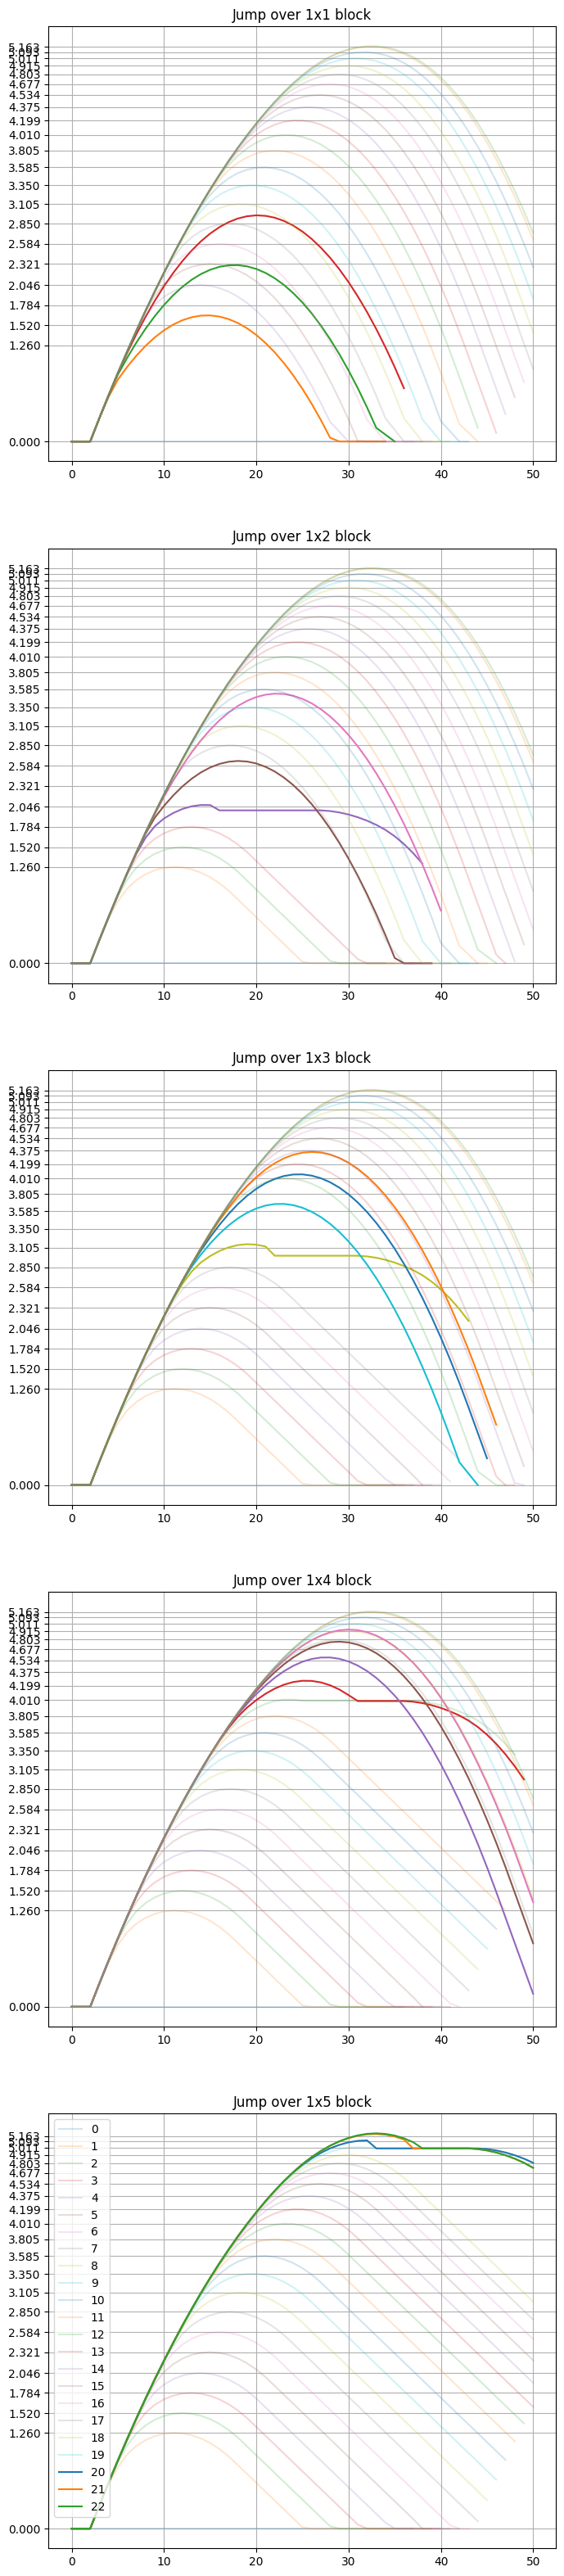

In [2]:
df = load_latest_results('WallBoostTests', 22, 50)

fix, ax = plt.subplots(5, 1, figsize=(8, 40))

highlighted = [
    (1,3),
    (4,6),
    (8,11),
    (13,16),
    (20,22),
]

yticks = []

for i in range(0,22):
    yticks.append([])


for scenario in df['ScenarioName'].unique():
    df0 = df[df['ScenarioName'] == scenario]
    maxTimeStep = df0['TimeStep'].max()
    df0 = df0[df0['PositionY'] >= 0]

    test = int(str(scenario.split('_')[3]).rsplit('(', 1)[1].rstrip(')'))-1
    jump1 = int(str(scenario.split('_')[1]).rsplit('(', 1)[1].rstrip(')'))
    # if jump1 != (preJump):
    #     continue
    axis = ax[test]
    axis.plot(df0['TimeStep'], df0['PositionY'], label=f"{jump1}")

    highlight_minMax = highlighted[test]

    if jump1 < highlight_minMax[0]:
        axis.lines[jump1].set_alpha(0.2)
    elif jump1 <= highlight_minMax[1]:
        axis.lines[jump1].set_alpha(1)
    else:
        axis.lines[jump1].set_alpha(0.2)

    yticks[jump1-1].append(df0['PositionY'].max())


yticks = [np.min(yticks[i]) for i in range(0,22)]

for i in range(0,5):
    ax[i].set_title(f"Jump over 1x{i + 1} block")
    ax[i].grid()
    ax[i].set_yticks(yticks)
    # ax[i].set_yticks(np.arange(0, 6, 0.5))

plt.legend()
# ax[preJump].y_label('PositionY')
# ax[preJump].x_label('TimeStep')
# plt.yticks(np.arange(0, 4, 0.5))


In [3]:
# df
dfX = df[df['ScenarioName']=='[Right,Sprint](026)_[Right,Sprint,Jump](021)_[Right,Sprint](030)']

dfX['VelocityY']

Series([], Name: VelocityY, dtype: float64)